### 1. Setup

In [25]:
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

# Import umum
import numpy as np
import os

# untuk membuat output notebook ini stabil di setiap eksekusi
np.random.seed(42)

# Untuk membuat gambar yang bagus
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Import untuk dataset Swiss Roll
from sklearn.datasets import make_swiss_roll

# Lokasi untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2. PCA (Principal Component Analysis)
buat dataset 3D sederhana:

Dataset 3D shape: (60, 3)
First 5 rows of dataset:
[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]


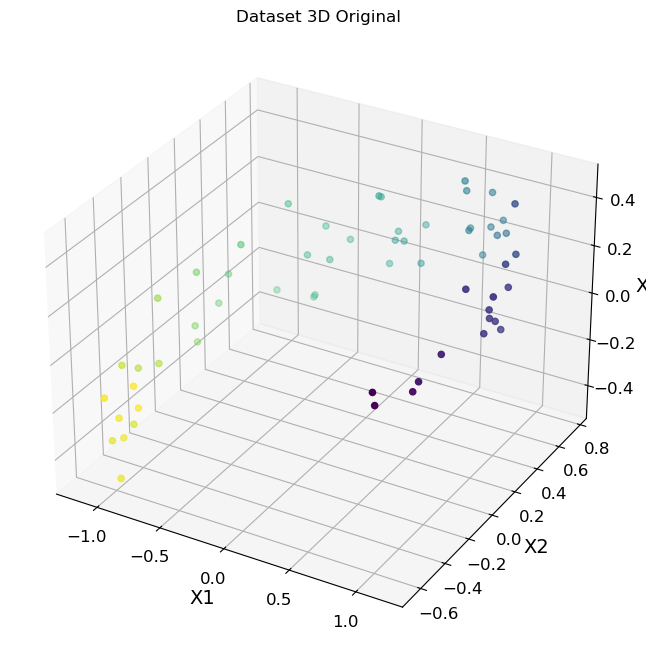

In [26]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print("Dataset 3D shape:", X.shape)
print("First 5 rows of dataset:")
print(X[:5])

# Visualisasi dataset 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=angles, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Dataset 3D Original')
plt.show()

#### Principal Components (Komponen Utama)

In [27]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

print("Principal Components:")
print("First PC:", c1)
print("Second PC:", c2)
print("Singular values:", s)

Principal Components:
First PC: [0.93636116 0.29854881 0.18465208]
Second PC: [-0.34027485  0.90119108  0.2684542 ]
Singular values: [6.77645005 2.82403671 0.78116597]


In [28]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [29]:
# Verifikasi SVD decomposition
is_correct = np.allclose(X_centered, U.dot(S).dot(Vt))
print("SVD decomposition correct:", is_correct)

SVD decomposition correct: True


#### Projecting Down to d Dimensions (Proyeksi ke Dimensi d)

In [30]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

print("2D projection shape:", X2D.shape)
print("First 5 rows of 2D projection:")
print(X2D[:5])

2D projection shape: (60, 2)
First 5 rows of 2D projection:
[[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]
 [-0.89305601  0.30862856]
 [-0.73016287  0.25404049]]


In [31]:
X2D_using_svd = X2D

#### Using Scikit-Learn (Menggunakan Scikit-Learn)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print("PCA results using Scikit-Learn:")
print("First 5 rows:", X2D[:5])
print("Manual SVD results:")
print("First 5 rows:", X2D_using_svd[:5])

PCA results using Scikit-Learn:
First 5 rows: [[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]
 [-0.89305601  0.30862856]
 [-0.73016287  0.25404049]]
Manual SVD results:
First 5 rows: [[-1.26203346 -0.42067648]
 [ 0.08001485  0.35272239]
 [-1.17545763 -0.36085729]
 [-0.89305601  0.30862856]
 [-0.73016287  0.25404049]]


In [33]:
X2D[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [34]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [35]:
# Cek apakah hasilnya sama (dengan tanda yang mungkin berbeda)
is_close = np.allclose(X2D, -X2D_using_svd)
print("Results match (with possible sign flip):", is_close)

Results match (with possible sign flip): False


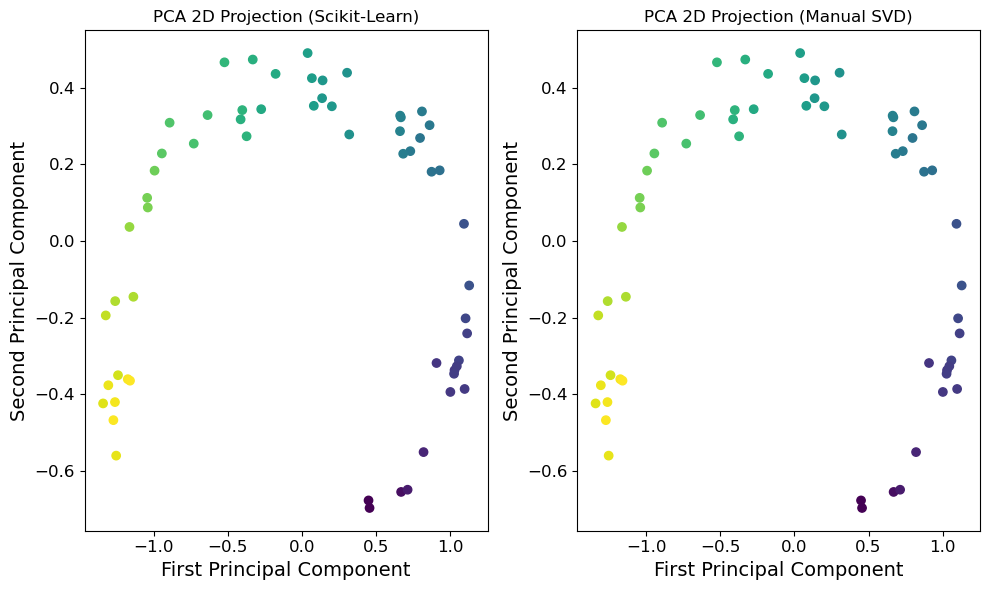

In [36]:
# Visualisasi hasil PCA 2D
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X2D[:, 0], X2D[:, 1], c=angles, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D Projection (Scikit-Learn)')

plt.subplot(1, 2, 2)
plt.scatter(X2D_using_svd[:, 0], X2D_using_svd[:, 1], c=angles, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D Projection (Manual SVD)')
plt.tight_layout()
plt.show()

##### Pulihkan titik 3D yang diproyeksikan pada bidang (subruang 2D PCA).

In [37]:
X3D_inv = pca.inverse_transform(X2D)

In [38]:
# Cek apakah pemulihan sempurna
is_perfect = np.allclose(X3D_inv, X)
print("Perfect reconstruction:", is_perfect)

Perfect reconstruction: False


In [39]:
# Hitung reconstruction error
reconstruction_error = np.mean(np.sum(np.square(X3D_inv - X), axis=1))
print("Mean squared reconstruction error:", reconstruction_error)

Mean squared reconstruction error: 0.01017033779284855


In [40]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [41]:
# Bandingkan hasil manual dengan Scikit-Learn
is_close_inv = np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)
print("Manual inverse transform matches Scikit-Learn:", is_close_inv)

Manual inverse transform matches Scikit-Learn: True


In [42]:
print("PCA components (Scikit-Learn):")
print(pca.components_)

PCA components (Scikit-Learn):
[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]


In [43]:
print("SVD Vt[:2] (Manual):")
print(Vt[:2])

SVD Vt[:2] (Manual):
[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]


#### Explained Variance Ratio (Rasio Varians yang Dijelaskan)

In [44]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.84248607 0.14631839]


In [45]:
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Total explained variance: 0.988804464429311


In [46]:
print("Unexplained variance:", 1 - pca.explained_variance_ratio_.sum())

Unexplained variance: 0.011195535570688975


In [47]:
# Bandingkan dengan manual calculation
manual_explained_variance = np.square(s) / np.square(s).sum()
print("Manual explained variance ratio:", manual_explained_variance)

Manual explained variance ratio: [0.84248607 0.14631839 0.01119554]


### 3. Choosing the Right Number of Dimensions (Memilih Jumlah Dimensi yang Tepat)

In [48]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

Loading MNIST dataset...


In [49]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("MNIST dataset loaded:")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

MNIST dataset loaded:
Training set shape: (56000, 784)
Test set shape: (14000, 784)


In [50]:
# Fit PCA untuk seluruh komponen
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [51]:
d

np.int64(154)

In [52]:
print("Number of components to preserve 95% variance:", d)

Number of components to preserve 95% variance: 154


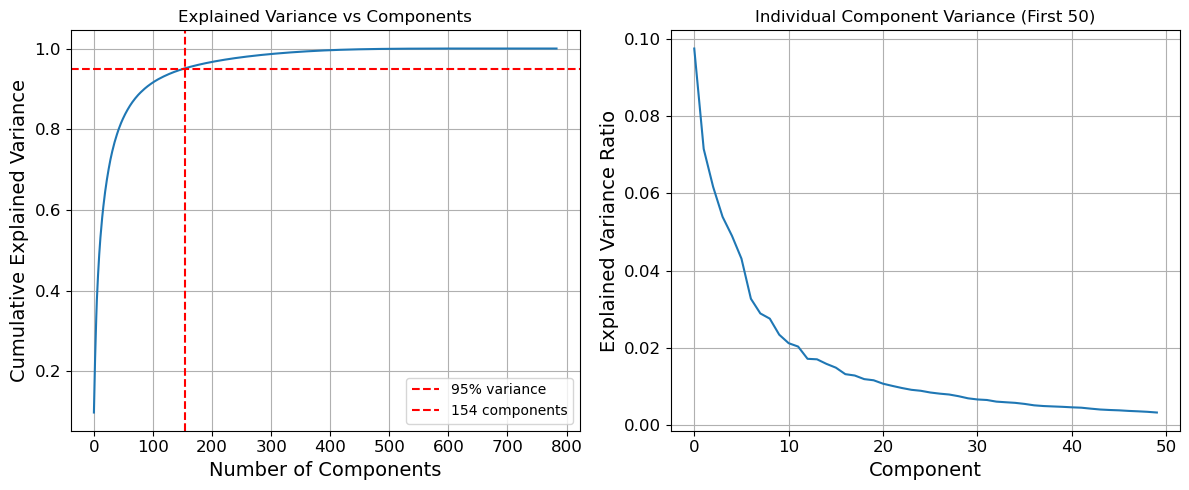

In [53]:
# Plot explained variance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cumsum)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=d, color='r', linestyle='--', label=f'{d} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_[:50])
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Component Variance (First 50)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Menggunakan PCA dengan threshold variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print("PCA with 95% variance threshold:")
print("Number of components:", pca.n_components_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

PCA with 95% variance threshold:
Number of components: 154
Total explained variance: 0.9504127888294237


### 4. PCA for Compression (PCA untuk Kompresi)

In [55]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

print("Compression results:")
print("Original size:", X_train.shape)
print("Compressed size:", X_reduced.shape)
print("Compression ratio:", X_train.shape[1] / X_reduced.shape[1])

Compression results:
Original size: (56000, 784)
Compressed size: (56000, 154)
Compression ratio: 5.090909090909091


In [56]:
# Function untuk plot digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)

    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

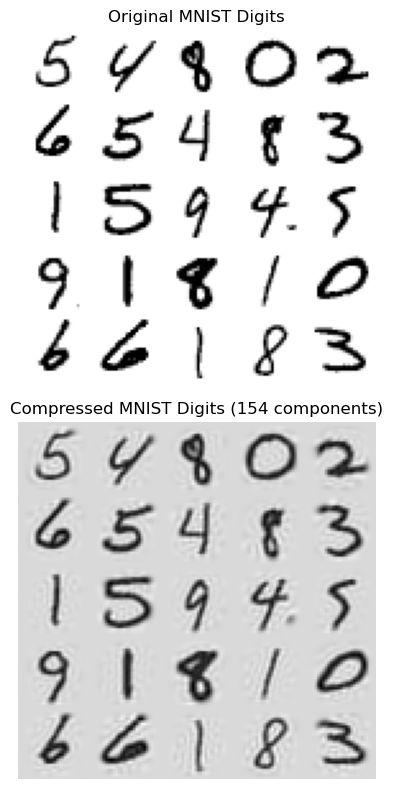

In [57]:
# Visualisasi perbandingan original vs compressed
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plot_digits(X_train[:25])
plt.title("Original MNIST Digits")

plt.subplot(2, 1, 2)
plot_digits(X_recovered[:25])
plt.title(f"Compressed MNIST Digits (154 components)")
plt.tight_layout()
plt.show()

X_reduced_pca = X_reduced

### 5. Randomized PCA (PCA Acak)

In [58]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced_rnd = rnd_pca.fit_transform(X_train)

print("Randomized PCA completed")
print("Shape of reduced data:", X_reduced_rnd.shape)

Randomized PCA completed
Shape of reduced data: (56000, 154)


### 6. Incremental PCA (PCA Inkremental)

In [59]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
print("Fitting Incremental PCA...")
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(X_train)
print("\nIncremental PCA completed")

Fitting Incremental PCA...
....................................................................................................
Incremental PCA completed


In [60]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced_inc)

In [61]:
X_reduced_inc_pca = X_reduced_inc

In [62]:
# Perbandingan hasil
print("Comparison of PCA methods:")
print("Regular PCA mean close to Incremental PCA mean:", np.allclose(pca.mean_, inc_pca.mean_))

Comparison of PCA methods:
Regular PCA mean close to Incremental PCA mean: True


In [63]:
print("Regular PCA results close to Incremental PCA:", np.allclose(X_reduced_pca, X_reduced_inc_pca))

Regular PCA results close to Incremental PCA: False


##### Menggunakan memmap():

In [64]:
filename = "my_mnist.data"
m, n = X_train.shape

# Buat memory-mapped file
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [65]:
del X_mm

In [66]:
# Load memory-mapped file
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
print("Memory-mapped Incremental PCA completed")

Memory-mapped Incremental PCA completed


#### Kompleksitas Waktu:

In [67]:
import time

print("Time complexity comparison:")
for n_components in (2, 10, 154):
    print(f"n_components = {n_components}")
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for name, pca_method in (("PCA", regular_pca), ("Inc PCA", inc_pca), ("Rnd PCA", rnd_pca)):
        t1 = time.time()
        pca_method.fit(X_train)
        t2 = time.time()
        print(f"    {name}: {t2 - t1:.1f} seconds")

Time complexity comparison:
n_components = 2
    PCA: 6.1 seconds
    Inc PCA: 12.1 seconds
    Rnd PCA: 1.8 seconds
n_components = 10
    PCA: 5.1 seconds
    Inc PCA: 8.2 seconds
    Rnd PCA: 1.8 seconds
n_components = 154
    PCA: 4.9 seconds
    Inc PCA: 14.2 seconds
    Rnd PCA: 3.5 seconds


##### Bandingkan PCA dan Randomized PCA

Running time complexity analysis...


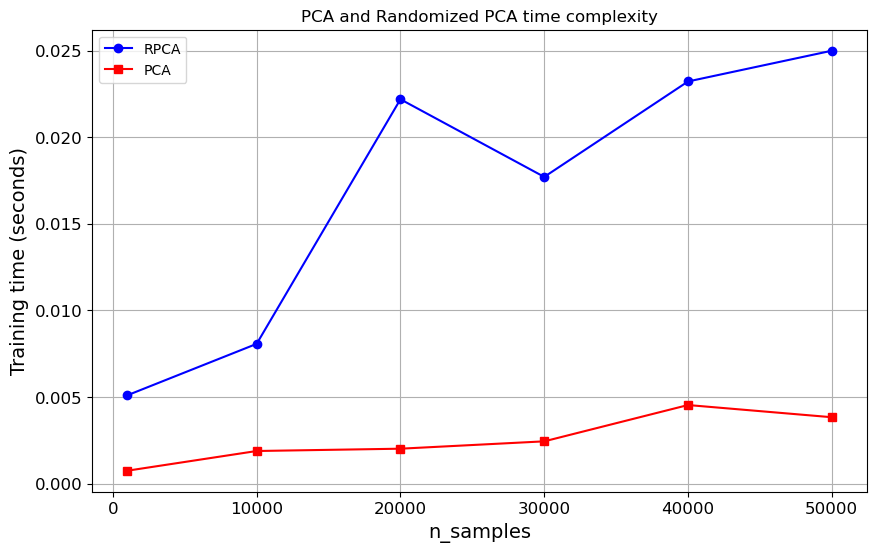

In [68]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000]

print("Running time complexity analysis...")
for n_samples in sizes:
    X_test = np.random.randn(n_samples, 5)
    
    # Randomized PCA
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X_test)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    # Full PCA
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X_test)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time (seconds)")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity")
plt.grid(True)
plt.show()

Running feature complexity analysis...


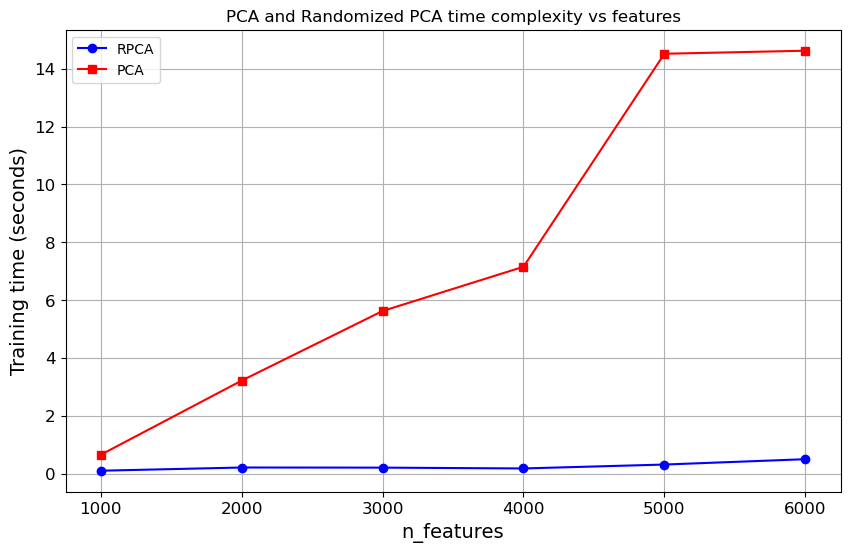

In [69]:
# Time complexity vs features
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]

print("Running feature complexity analysis...")
for n_features in sizes:
    X_test = np.random.randn(2000, n_features)
    
    # Randomized PCA
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X_test)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    # Full PCA
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X_test)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time (seconds)")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity vs features")
plt.grid(True)
plt.show()

### 7. Kernel PCA

Swiss Roll dataset shape: (1000, 3)


Text(0.5, 0, 'X3')

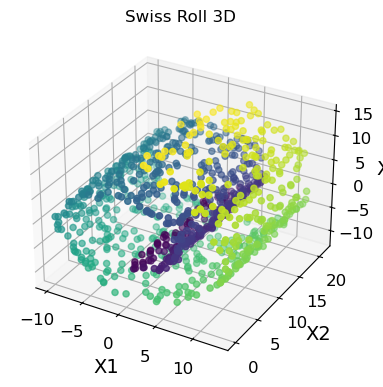

In [70]:
# Generate Swiss Roll dataset
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

print("Swiss Roll dataset shape:", X.shape)

# Visualisasi Swiss Roll
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap='viridis')
ax1.set_title('Swiss Roll 3D')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')

In [71]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced_kpca = rbf_pca.fit_transform(X)

ax2 = fig.add_subplot(132)
ax2.scatter(X_reduced_kpca[:, 0], X_reduced_kpca[:, 1], c=t, cmap='viridis')
ax2.set_title('Kernel PCA (RBF)')
ax2.set_xlabel('1st component')
ax2.set_ylabel('2nd component')

Text(0, 0.5, '2nd component')

In [72]:
# Compare with linear PCA
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

ax3 = fig.add_subplot(133)
ax3.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=t, cmap='viridis')
ax3.set_title('Linear PCA')
ax3.set_xlabel('1st component')
ax3.set_ylabel('2nd component')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

#### Selecting a Kernel and Tuning Hyperparameters (Memilih Kernel dan Menyetel Hyperparameter)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Untuk demo, gunakan subset data yang lebih kecil
X_small = X[:300]
y_small = (t[:300] > t[:300].mean()).astype(int)  # Binary classification

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs", max_iter=1000))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 5),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

print("Running Grid Search for Kernel PCA...")
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_small, y_small)

Running Grid Search for Kernel PCA...


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'kpca__gamma': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [74]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'kpca__gamma': np.float64(0.05), 'kpca__kernel': 'rbf'}
Best score: 0.69


In [75]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [76]:
from sklearn.metrics import mean_squared_error

reconstruction_error = mean_squared_error(X, X_preimage)
print("Kernel PCA reconstruction error:", reconstruction_error)

Kernel PCA reconstruction error: 32.786308795766125


### 8. LLE (Locally Linear Embedding)

In [77]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [78]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X)

print("LLE reconstruction error:", lle.reconstruction_error_)

LLE reconstruction error: 5.603900937122186e-08


### 9. Other Dimensionality Reduction Techniques (Teknik Reduksi Dimensi Lainnya)

In [79]:
# MDS
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [80]:
# Isomap
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [81]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [82]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"][:5000]  # Use subset for speed
y_mnist = mnist["target"][:5000]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

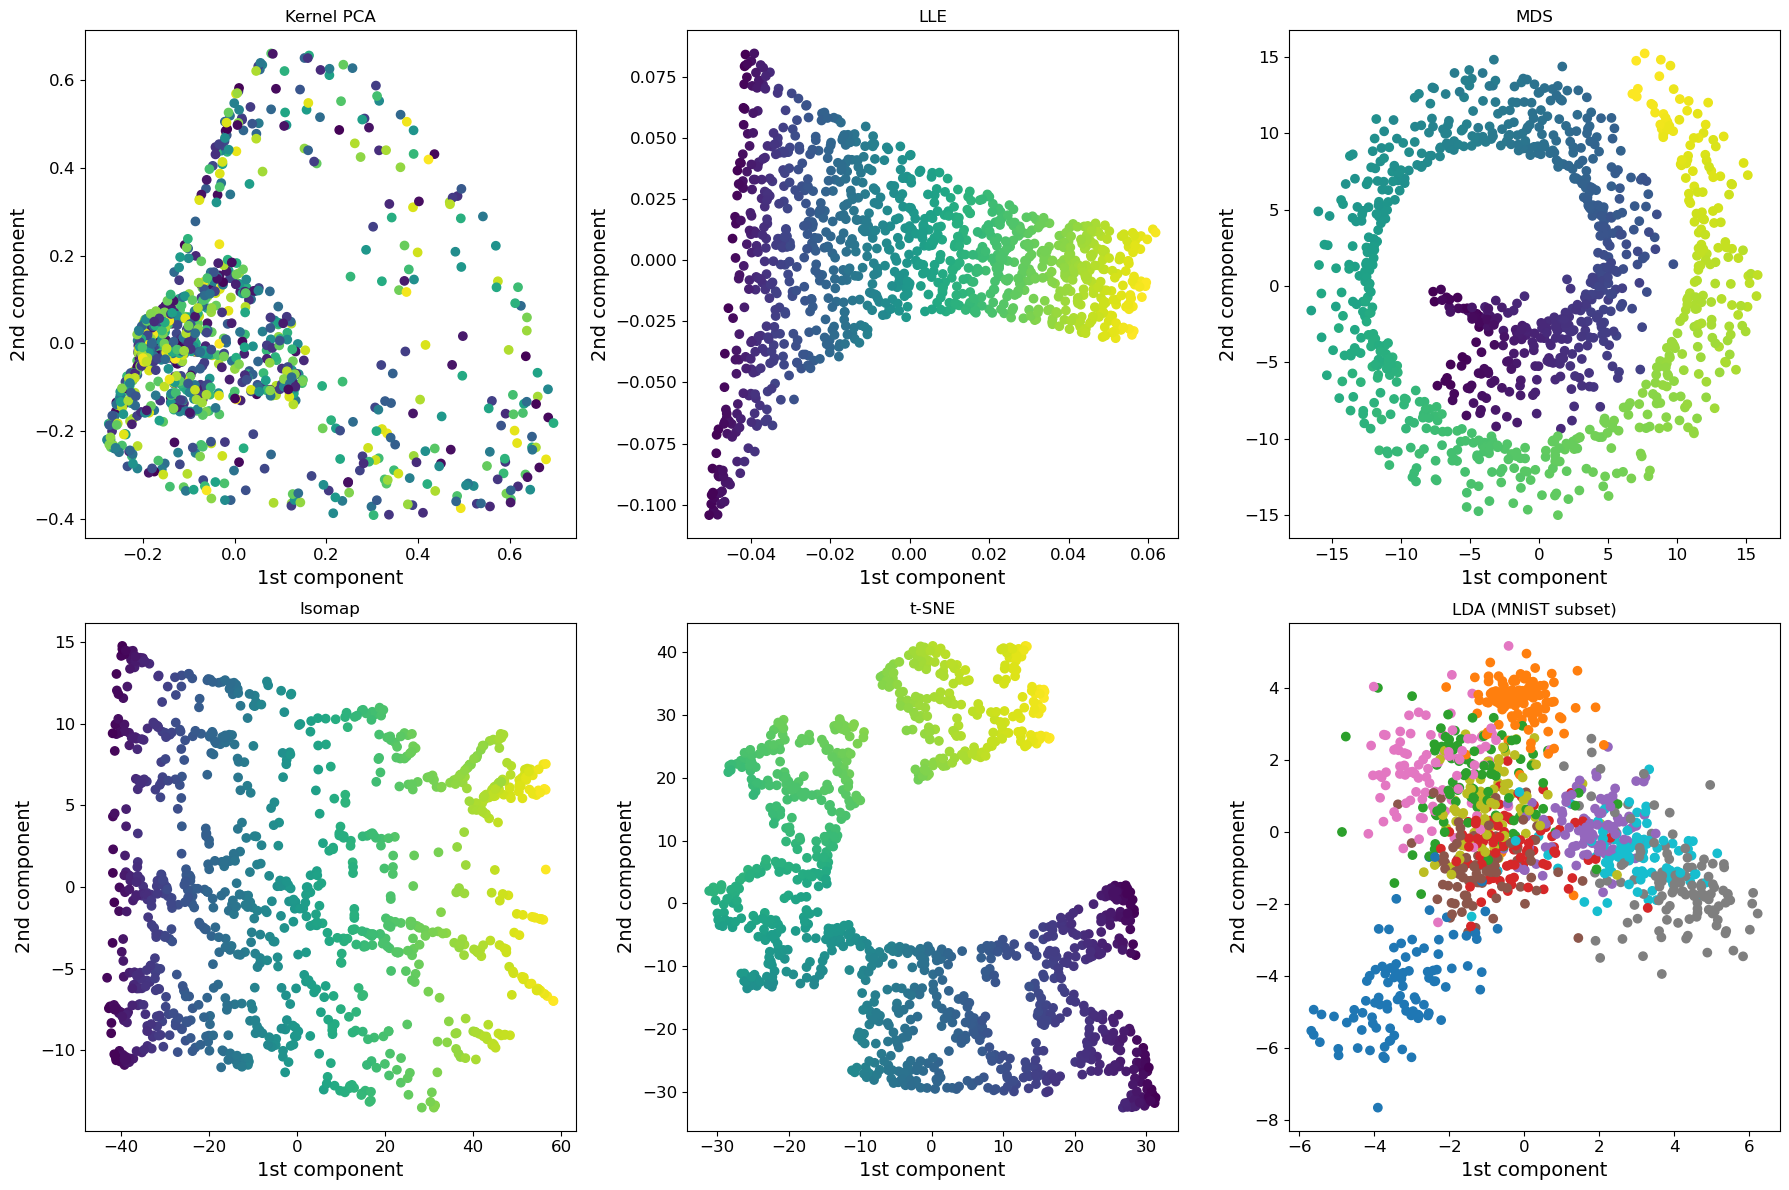

In [83]:
# Visualisasi semua teknik
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

techniques = [
    (X_reduced_kpca, "Kernel PCA"),
    (X_reduced_lle, "LLE"),
    (X_reduced_mds, "MDS"),
    (X_reduced_isomap, "Isomap"),
    (X_reduced_tsne, "t-SNE"),
    (X_reduced_lda[:1000], "LDA (MNIST subset)")
]

for i, (X_red, title) in enumerate(techniques):
    row, col = i // 3, i % 3
    if title == "LDA (MNIST subset)":
        scatter = axes[row, col].scatter(X_red[:, 0], X_red[:, 1], 
                                       c=y_mnist[:1000], cmap='tab10')
    else:
        scatter = axes[row, col].scatter(X_red[:, 0], X_red[:, 1], 
                                       c=t, cmap='viridis')
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('1st component')
    axes[row, col].set_ylabel('2nd component')

plt.tight_layout()
plt.show()

In [84]:
print("All dimensionality reduction techniques completed!")
print("Summary of results:")
print(f"- Original Swiss Roll data: {X.shape}")
print(f"- Kernel PCA: {X_reduced_kpca.shape}")
print(f"- LLE: {X_reduced_lle.shape}")
print(f"- MDS: {X_reduced_mds.shape}")
print(f"- Isomap: {X_reduced_isomap.shape}")
print(f"- t-SNE: {X_reduced_tsne.shape}")
print(f"- LDA: {X_reduced_lda.shape}")

All dimensionality reduction techniques completed!
Summary of results:
- Original Swiss Roll data: (1000, 3)
- Kernel PCA: (1000, 2)
- LLE: (1000, 2)
- MDS: (1000, 2)
- Isomap: (1000, 2)
- t-SNE: (1000, 2)
- LDA: (5000, 2)


---

# Dimensionality Reduction Techniques Summary

Berisi penjelasan berbagai teknik reduksi dimensi yang telah diimplementasikan, termasuk PCA, Kernel PCA, LLE, dan metode lainnya.

---

## 1. Principal Component Analysis (PCA)

### Dataset 3D Sederhana
- Dataset 3D dibuat dengan struktur manifold dan sedikit noise.
- Cocok untuk demonstrasi PCA karena varians dominan berada di dua dimensi.

### Komponen Utama & Proyeksi
- SVD diterapkan untuk menemukan arah utama varians (c1, c2).
- Data berhasil diproyeksikan ke ruang 2D menggunakan SVD manual dan `sklearn.decomposition.PCA`.
- Perbedaan tanda pada komponen adalah normal.

### Rekonstruksi & Error
- Data 3D direkonstruksi dari proyeksi 2D menggunakan `pca.inverse_transform`.
- Terdapat kehilangan informasi: `np.allclose(X3D_inv, X)` menghasilkan `False`.
- Reconstruction error dihitung dengan `np.mean(np.sum(np.square(X3D_inv - X), axis=1))`.

### Explained Variance
- `pca.explained_variance_ratio_`: 
  - Komponen 1: 84.2%
  - Komponen 2: 14.6%
  - Varians hilang: sekitar 1.2%

### Pemilihan Dimensi Otomatis (MNIST)
- `PCA(n_components=0.95)` memilih jumlah dimensi yang mempertahankan 95% varians (154 dimensi).
- Visualisasi menggunakan elbow plot.

### PCA untuk Kompresi (MNIST)
- Data 784 dimensi direduksi menjadi 154.
- Rekonstruksi hasil kompresi mempertahankan detail penting meskipun sedikit blur.

---

## 2. Randomized PCA dan Incremental PCA

### Randomized PCA
- Gunakan `svd_solver="randomized"`.
- Lebih cepat untuk dataset besar saat hanya sedikit komponen dibutuhkan.

### Incremental PCA
- Gunakan `IncrementalPCA` untuk memproses data besar dalam batch kecil.
- Hasil mendekati PCA biasa, meskipun sedikit berbeda karena aproksimasi.

### Performa & memmap
- Kecepatan Randomized PCA > Full PCA untuk data besar.
- `np.memmap` memungkinkan pelatihan pada dataset besar di disk.

---

## 3. Kernel PCA (K-PCA)

### Transformasi Non-linear
- Digunakan untuk data seperti Swiss Roll.
- Kernel RBF berhasil membuka manifold menjadi representasi linier.

### Pre-image Reconstruction
- `inverse_transform` digunakan, tetapi hasilnya hanya aproksimasi.
- Rekonstruksi umumnya menghasilkan error yang lebih besar.

### Tuning Hyperparameter
- `GridSearchCV` digunakan untuk mencari kernel dan gamma terbaik.
- Evaluasi dengan regresi logistik pada data tereduksi.

---

## 4. Teknik Lainnya

### LLE (Locally Linear Embedding)
- Fokus pada pelestarian hubungan lokal.
- Efektif membuka Swiss Roll (hasil lebih datar).

### MDS (Multidimensional Scaling)
- Pertahankan jarak antar titik sebanyak mungkin.

### Isomap
- Pertahankan jarak geodesik pada manifold.

### t-SNE
- Sangat baik untuk visualisasi data berdimensi tinggi.
- Pelestarian struktur lokal → sering menghasilkan klasterisasi yang jelas.

### LDA (Linear Discriminant Analysis)
- Teknik supervisi.
- Maksimalkan pemisahan antar kelas, cocok untuk klasifikasi.

---

**Catatan**: Setiap teknik memiliki kekuatan tersendiri tergantung pada struktur data dan tujuan analisis.